#### <font color = 'purple'> Natural Language Processing for Sentiment Analysis and multi classification models


###### Prepared by: `Olanrewaju Adegoke`

###### <font color = 'green'> About the dataset:

List of texts with emotion labels like joy, sadness, fear, anger etc.
    
Dataset is splitted into train, test and validation sets for building the machine learning model.
    
The validation set will be use to check the final performance of the algorithm (to make sure there is no overfitting over the test data).

###### <font color = 'green'> The Goal:

• Train different kind of models able to classify each text according to the sentiment mainly present
in it.

• Compare the results of the different models and try to analyze and explain the differences.


###### <font color = 'green'> Project Deliverables:

Train different classification models relying mainly on the following:

###### `0. Stochastic Modeling Approaching.`

###### `1. A Fully Connected Neural Network.`

###### `2. A Recurrent Neural Network, based on LSTM or GRU.`

###### `3. A fine-tuned Transformer Architecture from a pretrained model that can be found on sites like HuggingFace.`

###### `4. Compare the different models to find the best approach and explained what you have learnt from this exercise and how would you proceed with another text classification use case.`

###### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

###### Define the paths to the folder

In [2]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\nlp_projects\\nlp_project_sentiment_analysis'
data_path = '../data'
model_path = '../models'
note_path = '../notebooks'
out_path = '../outputs'
res_path = '../resources'

###### Load the dataset

In [3]:
os.chdir(data_path)

In [4]:
train = pd.read_csv('train.txt', header=None, sep=';', names=['text', 'emotions'])
train.head(2)

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness


In [5]:
with open('test.txt', 'r') as file:
    text_line = file.readlines()
    
text = [tuple(txt.strip().split(';')) for txt in text_line]

test = pd.DataFrame(text, columns=['text', 'emotions'])

test.head(2)

,text,emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness


In [6]:
with open('validation.txt', 'r') as file:
    text_line = file.readlines()
    
text = [txt.strip().split(';') for txt in text_line]

val = pd.DataFrame(text, columns=['text', 'emotions'])

val.head(2)

,text,emotions
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness


In [7]:
os.chdir(note_path)

###### `Build a larger dataset by concatenating the train, test and val since all have the emotions which is the target in them.`

In [8]:
df = pd.concat([train, test, val], axis=0)
df

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [9]:
df = df.reset_index(drop=True)
df

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [10]:
df.shape

(20000, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      20000 non-null  object
 1   emotions  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


###### Preprocessing of text in NLP include:

###### *`Cleaning`*
 - Remove capitalizations
 - Remove all symbols
 - Remove all numbers
 - Remove all punctuations
 - Correcting the spelling errors
 - Remove non words
 - Remove all stopwords
 - Stemming and Lemmatization: Normalization
 - Wordcount

###### *`Preprocessing`*
 - Term Frequency-Inverse document frequency (TF-IDF): n_grams - (bi_grams, tri_grams, tetra_grams)
 - Bag of words - CountVectorization
 - Tokenization with Tensorflow and Keras

###### *`Model Development and Deployment`*
 - Modeling

###### *`Strategy`*
 - Automate functions for various data preprocessing and cleaning tasks
 - Implement a function as data cleaning pipeline
 - Perform Exploratory Data Analytics using: Bag of words (BOW), Wordcloud, Frequency counts 

In [12]:
print(df.text[0])
print(df.text[0].lower())

i didnt feel humiliated
i didnt feel humiliated


###### Select features and lables

In [13]:
features = df.drop(columns=['emotions'])
labels = df['emotions']

In [14]:
features.head()

,text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


In [15]:
labels.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [16]:
labels.value_counts()

emotions
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

### Data Preprocessing Pipelines

###### Convert text to lower case

In [17]:
def convert_to_lower(features):
    lower_case_text = features.lower()
    return lower_case_text   

###### Remove contractions from text

`Contractions are words in the form can't, don't, didn't etc and there is the need to always remove them.`

In [18]:
import contractions

def remove_contractions(features):
    text_without_contraction = contractions.fix(features)
    return text_without_contraction

In [19]:
import string

def string_punctuation():
    string_punc = string.punctuation
    print(f'The punctuations are: {string_punc}')

In [20]:
string_punctuation()

The punctuations are: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
import string

def remove_punctuation(features):
    string_punc = string.punctuation
    text_without_punc = "".join([word for word in features if word not in string_punc])
    return text_without_punc

In [22]:
def remove_number(features):
    num_removed = ''.join([char for char in features if not char.isdigit()])
    return num_removed

In [23]:
def remove_symbols(features):

    word_list = []
    words = features.split()
    for word in words:
        no_symbol = ''.join([char for char in word if char.isalpha()])
        word_list.append(no_symbol)
        text_no_sym = ' '.join([word for word in word_list])
        
    return text_no_sym

###### Natural Language Toolkit - NLTK for Removing stopwords

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###### English Stopwords

In [25]:
stop_words = stopwords.words('english')
print(stop_words)
print('')
print('length of english stop words is: ', len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(features):
    stop_words = stopwords.words('english')
    words = features.split()
    no_stop_word = ' '.join([word for word in words if word not in stop_words])
    return no_stop_word    

##### Stemming and Lemmatization

###### Stemming

In [27]:
from nltk.stem import PorterStemmer

In [28]:
stemmer = PorterStemmer()
stemmer

<PorterStemmer>

In [29]:
tokens = ['buy', 'running', 'going', 'cooking', 'dancing']
[stemmer.stem(word) for word in tokens]

['buy', 'run', 'go', 'cook', 'danc']

In [30]:
from nltk.stem import PorterStemmer

def stemming(features):
    stemmer = PorterStemmer()
    tokens = [token for token in features.split()]
    stemmed_word = ' '.join([stemmer.stem(word) for word in tokens])
    #print(f'The tokens are: {tokens}')
    return stemmed_word   

###### Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
nltk.download('wordnet')
#nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
lemmer =  WordNetLemmatizer()
lemmer

<WordNetLemmatizer>

In [34]:
tokens = ['buy', 'running', 'going', 'cooking', 'dancing']
[lemmer.lemmatize(word) for word in tokens]

['buy', 'running', 'going', 'cooking', 'dancing']

In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatization(features):
    lemmer =  WordNetLemmatizer()
    tokens = [token for token in features.split()]
    lemmed_word = ' '.join([lemmer.lemmatize(word) for word in tokens])
    #print(f'The tokens are: {tokens}')
    return lemmed_word   

[nltk_data] Downloading package wordnet to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###### Text striper

`Removes unwanted words or characters`

In [36]:
unwanted_symbols = ['xyz', 'abc1234', '@#2354', '!l', 'a@']

def text_striper(features):
    text = features.split()
    new_text = ' '.join([x for x in text if x not in unwanted_symbols])
    return new_text  

##### Preprocessing Pipeline for Text

In [37]:
import contractions
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def text_preprocessor(features, mode=True):
    '''
    This function preprocessing a text data with the following sequence:
    convert to lower
    remove contractions
    remove punctuations
    remove numbers within text
    remove alpha-numeric symbols
    remove stopwords
    get the root word by stemming if mode = True or lemmatization if mode = False.
    Returns a cleaned text.

    ***Developed by Olanrewaju Adegoke***
    '''
    features = convert_to_lower(features)
    features = remove_contractions(features)
    features = remove_punctuation(features)
    features = remove_number(features)
    features = remove_symbols(features)
    features = remove_stopwords(features)
    if mode == True:
        features = stemming(features)
    else:
        features = lemmatization(features)
    return features   

[nltk_data] Downloading package stopwords to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
features.head()

,text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


###### Using the preprocessing pipeline on the features

In [39]:
features['cleaned_text'] = features['text'].apply(text_preprocessor)

In [40]:
features.head()

,text,cleaned_text
0,i didnt feel humiliated,feel humili
1,i can go from feeling so hopeless to so damned...,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,feel grouchi


###### WordCloud
`To determine which words occurs most`

In [41]:
all_text_joined = ' '.join(features['cleaned_text'])

In [42]:
from wordcloud import WordCloud

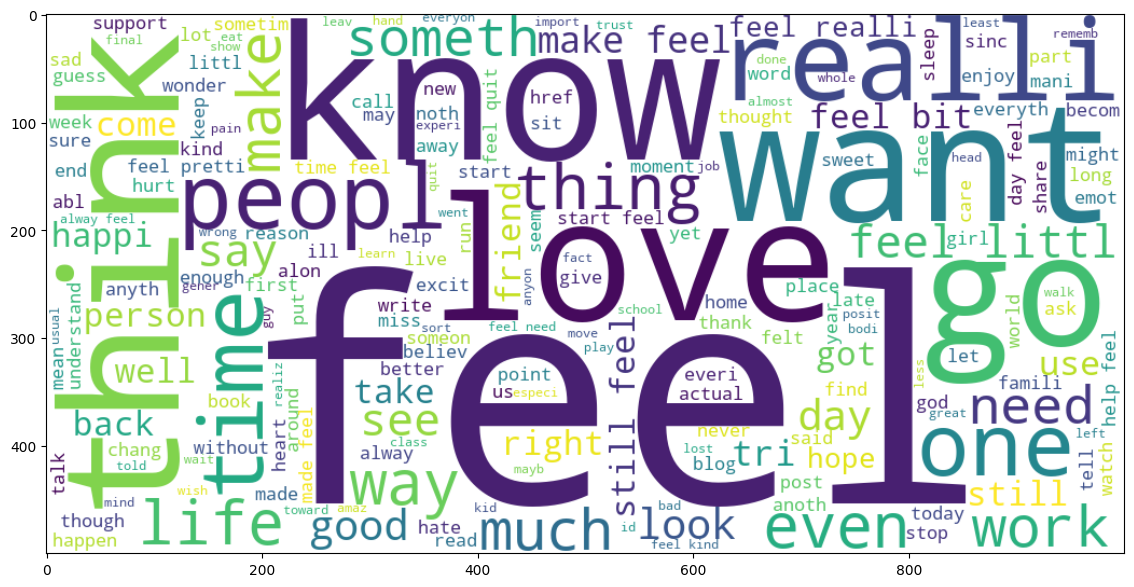

In [43]:
word_cloud = WordCloud(width=1000, height=500, background_color='white', random_state=42, include_numbers=True).generate(all_text_joined)
plt.figure(figsize=(15, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

The dominant words people often use to express emotions are: `feel`, `love`, `thing`, `know`, `want`, `go`

In [44]:
word_cloud

###### method 1

## TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY VECTORIZER
`count the number of each grams it occurs divided by the total number of grams in the basket - Term Frequency.`

In [45]:
X = features['cleaned_text']
X

0                                              feel humili
1        go feel hopeless damn hope around someon care ...
2                        grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
19995    ssa examin tomorrow morn quit well prepar come...
19996    constantli worri fight natur push limit inner ...
19997                  feel import share info experi thing
19998    truli feel passion enough someth stay true suc...
19999      feel like want buy cute make see onlin even one
Name: cleaned_text, Length: 20000, dtype: object

In [46]:
y = labels
y

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
19995    sadness
19996        joy
19997        joy
19998        joy
19999        joy
Name: emotions, Length: 20000, dtype: object

###### Vectorizing features X and labels y

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
max_feat = 5000

tfidf_vec = TfidfVectorizer(ngram_range=(1, 4), max_features=max_feat)   # generate 1_gram, 2_grams, 3_grams and 4_grams
tfidf_vec

TfidfVectorizer(max_features=5000, ngram_range=(1, 4))

In [49]:
X_vectorized = tfidf_vec.fit_transform(X)
X_vectorized

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 201182 stored elements and shape (20000, 5000)>

In [50]:
X_arr = X_vectorized.toarray()
X_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
X_df = pd.DataFrame(X_arr, columns=tfidf_vec.get_feature_names_out())
X_df.head()

,abandon,abil,abit,abl,abl feel,abl find,abl get,abl help,abl take,absolut,...,yet still,yoga,york,young,younger,youth,youtub,zero,zombi,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
n_grams = list(X_df.columns)

In [53]:
X_df.feel

0        0.103972
1        0.052316
2        0.055945
3        0.058743
4        0.093755
           ...   
19995    0.028536
19996    0.038221
19997    0.063749
19998    0.052350
19999    0.052685
Name: feel, Length: 20000, dtype: float64

In [54]:
X_df.humili

0        0.684407
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
19995    0.000000
19996    0.000000
19997    0.000000
19998    0.000000
19999    0.000000
Name: humili, Length: 20000, dtype: float64

###### labels

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [57]:
y_arr = y.values
y_arr[:10]

array(['sadness', 'sadness', 'anger', 'love', 'anger', 'sadness',
       'surprise', 'fear', 'joy', 'love'], dtype=object)

In [58]:
y_arr_encoded = label_encoder.fit_transform(y_arr)
y_arr_encoded[:10]

array([4, 4, 0, 3, 0, 4, 5, 1, 2, 3])

In [59]:
y_df = pd.DataFrame(y_arr_encoded, columns=['emotions'])
y_df.head()

,emotions
0,4
1,4
2,0
3,3
4,0


###### Train_Test_Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
test_size = 0.1
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X_df, y_arr_encoded, test_size=test_size, random_state=seed)

###### Fit the model

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
naive_multi_nb_model = MultinomialNB()
naive_multi_nb_model

MultinomialNB()

In [64]:
naive_multi_nb_model.fit(X_train, y_train)

MultinomialNB()

In [65]:
y_pred = naive_multi_nb_model.predict(X_test)
y_pred

array([0, 2, 4, ..., 2, 3, 2])

###### Evaluation of Model

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def model_evaluation():
    acc = accuracy_score(y_pred, y_test)
    prec = precision_score(y_pred, y_test, average='weighted')
    rec = recall_score(y_pred, y_test, average='weighted')
    f1 = f1_score(y_pred, y_test, average='weighted')
    class_report = classification_report(y_pred, y_test)
    print(f'The accuracy score is: {round(acc, 2)*100}%')
    print(f'The precision score is: {round(prec, 2)*100}%')
    print(f'The recall score is: {round(rec, 2)*100}%')
    print(f'The f1 score is: {round(f1, 2)*100}%\n')
    print('The classification report: ')
    print(f'{class_report}')

In [68]:
model_evaluation()

The accuracy score is: 81.0%
The precision score is: 89.0%
The recall score is: 81.0%
The f1 score is: 83.0%

The classification report: 
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       201
           1       0.67      0.90      0.77       171
           2       0.98      0.73      0.84       902
           3       0.39      0.98      0.56        64
           4       0.93      0.83      0.88       651
           5       0.12      1.00      0.22        11

    accuracy                           0.81      2000
   macro avg       0.64      0.90      0.68      2000
weighted avg       0.89      0.81      0.83      2000



###### Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

###### Obtaining the label names

In [70]:
label_encoder

LabelEncoder()

In [71]:
y_test_label = label_encoder.inverse_transform(y_test)
y_pred_label = label_encoder.inverse_transform(y_pred)
print(f'The labels for y_test is: {y_test_label}')
print(f'The labels for y_pred is: {y_pred_label}')

The labels for y_test is: ['anger' 'joy' 'sadness' ... 'joy' 'love' 'joy']
The labels for y_pred is: ['anger' 'joy' 'sadness' ... 'joy' 'love' 'joy']


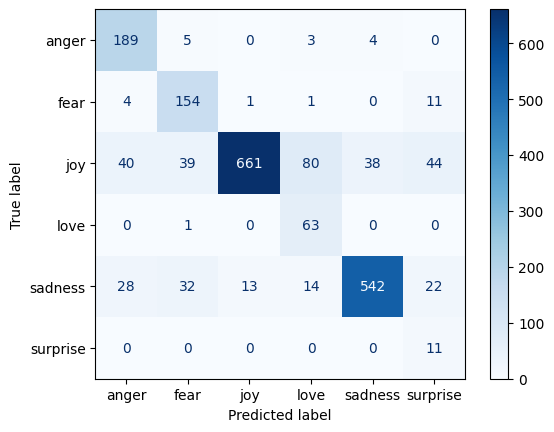

In [72]:
conf_mat = confusion_matrix(y_pred_label, y_test_label)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

###### Method 2

## VECTORIZING USING BAG OF WORDS VECTORIZER

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
max_feat = 5000

bow_vec = CountVectorizer(ngram_range=(1, 4), max_features=max_feat)
bow_vec

CountVectorizer(max_features=5000, ngram_range=(1, 4))

In [75]:
X_bow_vectorized = bow_vec.fit_transform(X)
X_bow_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 201182 stored elements and shape (20000, 5000)>

In [76]:
X_bow_arr = X_bow_vectorized.toarray()
X_bow_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
X_bow_df = pd.DataFrame(X_bow_arr, columns=bow_vec.get_feature_names_out())
X_bow_df.head()

,abandon,abil,abit,abl,abl feel,abl find,abl get,abl help,abl take,absolut,...,yet still,yoga,york,young,younger,youth,youtub,zero,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_arr_encoded

array([4, 4, 0, ..., 2, 2, 2])

###### Train_Test_split

In [79]:
from sklearn.model_selection import train_test_split

test_size = 0.1
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X_bow_df, y_arr_encoded, test_size=test_size, random_state=seed)

###### Train the model and make predictions

In [80]:
from sklearn.naive_bayes import MultinomialNB

naive_nb_bow_model = MultinomialNB()

naive_nb_bow_model.fit(X_train, y_train)

y_pred = naive_nb_bow_model.predict(X_test)

###### Model Evaluation

In [81]:
model_evaluation()

The accuracy score is: 86.0%
The precision score is: 86.0%
The recall score is: 86.0%
The f1 score is: 86.0%

The classification report: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       257
           1       0.84      0.80      0.82       240
           2       0.90      0.87      0.89       695
           3       0.75      0.77      0.76       156
           4       0.90      0.90      0.90       582
           5       0.59      0.74      0.66        70

    accuracy                           0.86      2000
   macro avg       0.80      0.82      0.81      2000
weighted avg       0.86      0.86      0.86      2000



###### Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[217,   6,   9,   7,  16,   2],
       [ 12, 193,   8,   2,   9,  16],
       [ 15,  11, 608,  26,  24,  11],
       [  1,   3,  26, 120,   5,   1],
       [ 15,  12,  18,   6, 525,   6],
       [  1,   6,   6,   0,   5,  52]], dtype=int64)

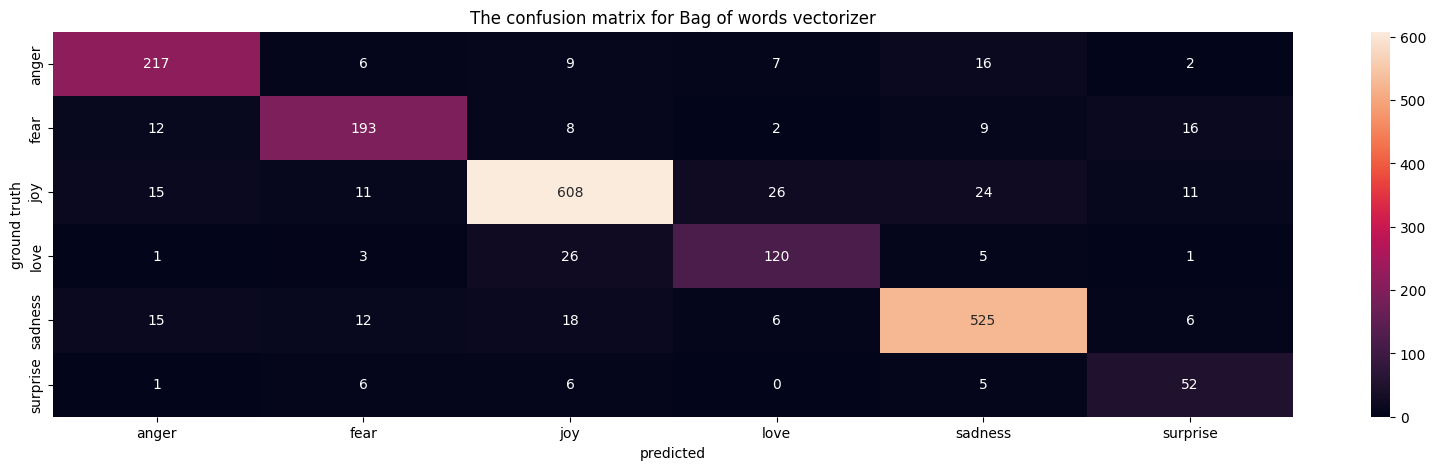

In [84]:
label_num = [0, 1, 2, 3, 4, 5]

labels = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

plt.figure(figsize=(20, 5))

sb.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The confusion matrix for Bag of words vectorizer')
plt.show()

###### Saving all the preprocessing steps for tfidf and bow and the associated models

In [85]:
import pickle

In [86]:
os.chdir(model_path)

In [87]:
os.chdir(note_path)

###### Method 3

## TOKENIZATION - TOKENIZERS from TENSORFLOW

In [88]:
df.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


###### Select features and target

In [89]:
features = df.drop('emotions', axis=1)
target = df['emotions']

In [90]:
features.head()

,text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


In [91]:
target.head()

0    sadness
1    sadness
2      anger
3       love
4      anger
Name: emotions, dtype: object

###### Cleaning the text data using the python function

In [92]:
import contractions
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def text_cleaning(features, mode=True):
    '''
    This function cleans a text data with the following sequence:
    convert to lower
    remove contractions
    remove punctuations
    remove numbers within text
    remove alpha-numeric symbols
    remove stopwords
    get the root word by stemming if mode = True or lemmatization if mode = False.
    Returns a cleaned text.

    ***Developed by Olanrewaju Adegoke***
    '''
    features = convert_to_lower(features)
    features = remove_contractions(features)
    features = remove_punctuation(features)
    features = remove_number(features)
    features = remove_symbols(features)
    features = remove_stopwords(features)
    if mode == True:
        features = stemming(features)
    else:
        features = lemmatization(features)
    return features  

[nltk_data] Downloading package stopwords to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Olanrewaju
[nltk_data]     Adegoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
features['cleaned_text'] = features['text'].apply(text_cleaning)
features.head()

,text,cleaned_text
0,i didnt feel humiliated,feel humili
1,i can go from feeling so hopeless to so damned...,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,feel grouchi


In [94]:
new_feat = features['cleaned_text']
new_feat.head()

0                                          feel humili
1    go feel hopeless damn hope around someon care ...
2                    grab minut post feel greedi wrong
3       ever feel nostalg fireplac know still properti
4                                         feel grouchi
Name: cleaned_text, dtype: object

###### Split `text` into train and test

In [95]:
from sklearn.model_selection import train_test_split

def train_test_splitter(features, target, size, seed):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=size, random_state=seed)
    return features_train, features_test, target_train, target_test    

In [96]:
features = new_feat
target = target
size = 0.1
seed = 42

X_train, X_test, y_train, y_test = train_test_splitter(features, target, size, seed)

In [97]:
print('Training text: ', len(X_train))
print('Training labels: ', len(y_train))
print('Testing text: ', len(X_test))
print('Testing labels: ', len(y_test))

Training text:  18000
Training labels:  18000
Testing text:  2000
Testing labels:  2000


#### Preprocessing using Tokenization

###### Maximum Word used for Tokenizers

In [98]:
from collections import Counter

def max_word_using_frequency_based(training):
    counter = Counter()
    for text in training:
        counter.update(text.split())
    max_word = len(counter)
    top_5_word = counter.most_common(len(counter))
    print(f'The maximum word for the tokenizer is: {max_word}')
    print(
        'The top 5 most common words with their counts are: --> '
        f'{top_5_word[:5]}'
    )    

In [99]:
max_word_using_frequency_based(training=X_train)

The maximum word for the tokenizer is: 10967
The top 5 most common words with their counts are: --> [('feel', 19087), ('like', 3408), ('get', 1116), ('know', 1072), ('time', 1070)]


###### Maximum length for padding sequence

In [100]:
def max_length_padding_seq(training):
    sentence_length = [len(text.split()) for text in training]
    mean_length = np.mean(sentence_length)
    median_length = np.median(sentence_length)
    stand_len = np.std(sentence_length)
    percentile_len = int(np.percentile(sentence_length, 95))
    print('Choose any one according to the nature of the text task: \n')
    print(f'The average length of the padding sequence is: {round(mean_length)}')
    print(f'The median length of the padding sequence is: {round(median_length)}')
    print(f'The standard deviation for the length of the padding sequence is: {round(stand_len)}')
    print(f'The 95th percentile for the coverage for the length of the padding sequence is: {percentile_len}')
    plt.hist(sentence_length, bins=50)
    plt.show()   

Choose any one according to the nature of the text task: 

The average length of the padding sequence is: 9
The median length of the padding sequence is: 8
The standard deviation for the length of the padding sequence is: 5
The 95th percentile for the coverage for the length of the padding sequence is: 19


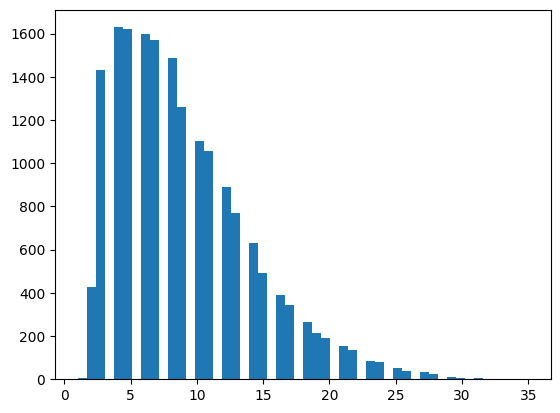

In [101]:
max_length_padding_seq(training=X_train)

###### Tokenization and padding of sequence

In [102]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenizer_and_padding(training, maxword_token, maxlen_pad, padding=True):
    tokenizer = Tokenizer(num_words=maxword_token)
    tokenizer.fit_on_texts(training)
    text_seq = tokenizer.texts_to_sequences(training)

    if padding == True:
        padded_seq = pad_sequences(text_seq, maxlen=maxlen_pad, padding='post')
    else:
        padded_seq = pad_sequences(text_seq, maxlen=maxlen_pad, padding='pre')
        
    return tokenizer, padded_seq    

In [103]:
training = X_train
maxword_token = 10967
maxlen_pad = 19

tokenizer, feature_tokenized = tokenizer_and_padding(training, maxword_token, maxlen_pad, padding=True)

###### One_Hot_Encoding the Labels - emotions

In [104]:
y_train.head()

16270    anger
1383      love
3472      fear
19900      joy
2150     anger
Name: emotions, dtype: object

In [105]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def label_encoding(labels):
    label_arr = labels.values
    label_encoder = LabelEncoder()
    label_encoded = label_encoder.fit_transform(label_arr)
    labels = to_categorical(label_encoded)
    return label_encoder, labels    

In [106]:
label_encoder, labels = label_encoding(labels=y_train)

###### Saving the preprocessing steps for tokenizer

In [107]:
import pickle

In [108]:
os.chdir(model_path)

In [109]:
os.chdir(note_path)

###### Preprocessing the Test data

In [110]:
X_test.head()

10650    notic sever month ago start feel resent walk t...
2041     love lot differ kind sport love hang friend fr...
8668                            feel even kill agon extent
1114                 feel numb way wound realli start hurt
13902           feel happi inspir littl si love read write
Name: cleaned_text, dtype: object

In [111]:
y_test.head()

10650      anger
2041         joy
8668     sadness
1114     sadness
13902        joy
Name: emotions, dtype: object

###### Load the preprocessing steps saved

In [112]:
import pickle
os.chdir(model_path)

with open('feature_tokenizer_and_label_encoder.pkl', 'rb') as file:
    token_label = pickle.load(file)

os.chdir(note_path)
token_label

{'feature_tokenizer': <keras.src.legacy.preprocessing.text.Tokenizer at 0x28697263bf0>,
 'label_encoder': LabelEncoder()}

In [113]:
tokenizer = token_label['feature_tokenizer']
label_encoder = token_label['label_encoder']

In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
tokenizer
label_encoder

def testing_data_preprocessor(test_feat, test_target, maxlen_pad=maxlen_pad, padding=True):
    
    test_feat_seq = tokenizer.texts_to_sequences(test_feat)
    
    if padding == True:
        padded_test_seq = pad_sequences(test_feat_seq, maxlen=maxlen_pad, padding='post')
    else:
        padded_test_seq = pad_sequences(test_feat_seq, maxlen=maxlen_pad, padding='pre')

    test_label_arr = test_target.values
    test_label_encoded = label_encoder.transform(test_label_arr)
    test_labels = to_categorical(test_label_encoded)
        
    return padded_test_seq, test_labels 

In [115]:
test_feat = X_test
test_target = y_test

X_test_tokenized, y_test_encoded = testing_data_preprocessor(test_feat, test_target, maxlen_pad=maxlen_pad, padding=True)

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU, Flatten,Dropout

#### <font color = 'green'> 1. Classification model relying on a Fully Connected Neural Network (FCNN)

###### <font color = 'green'> Building the FCNN Model

In [117]:
maxword_token = 10967
maxlen_pad = 19

In [118]:
model_fcnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=maxword_token, output_dim=64, input_length=maxlen_pad),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


###### <font color = 'green'> Compile the fully connected neural network model

In [119]:
model_fcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###### <font color = 'green'> Summarizing the total, trainable and non-trainable parameters from the model:

In [120]:
model_fcnn.build(input_shape=(None, maxlen_pad))
model_fcnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 19, 64)              │         701,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         155,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 866,310 (3.30 MB)

 Trainable params: 866,310 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

###### <font color='green'> Training the `fcnn` model

In [121]:
# Paramenters for the model
EPOCHS = 10
BATCHSIZE = 32

In [122]:
history = model_fcnn.fit(feature_tokenized, labels, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test_tokenized, y_test_encoded))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4178 - loss: 1.4424 - val_accuracy: 0.8090 - val_loss: 0.5495
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8679 - loss: 0.3997 - val_accuracy: 0.8525 - val_loss: 0.4517
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9461 - loss: 0.1785 - val_accuracy: 0.8555 - val_loss: 0.4960
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9698 - loss: 0.0958 - val_accuracy: 0.8540 - val_loss: 0.5884
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9826 - loss: 0.0579 - val_accuracy: 0.8410 - val_loss: 0.7075
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9859 - loss: 0.0426 - val_accuracy: 0.8430 - val_loss: 0.7639
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.8450 - val_loss: 0.8636
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9909 - loss: 0.0306 - val_ac

###### <font color = 'green'> Evaluate the performance of the fcnn model

In [123]:
fcnn_test_loss, fcnn_test_accuracy = model_fcnn.evaluate(X_test_tokenized, y_test_encoded)
print(f'\nThe FCNN Test Accuracy is: {round(fcnn_test_accuracy,2)*100}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.9478

The FCNN Test Accuracy is: 84.0%


###### Visualization Function

In [124]:
def visualization(history):

  # Plot training and validation accuracy values
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training and validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Show the plots
  plt.tight_layout()
  plt.show()

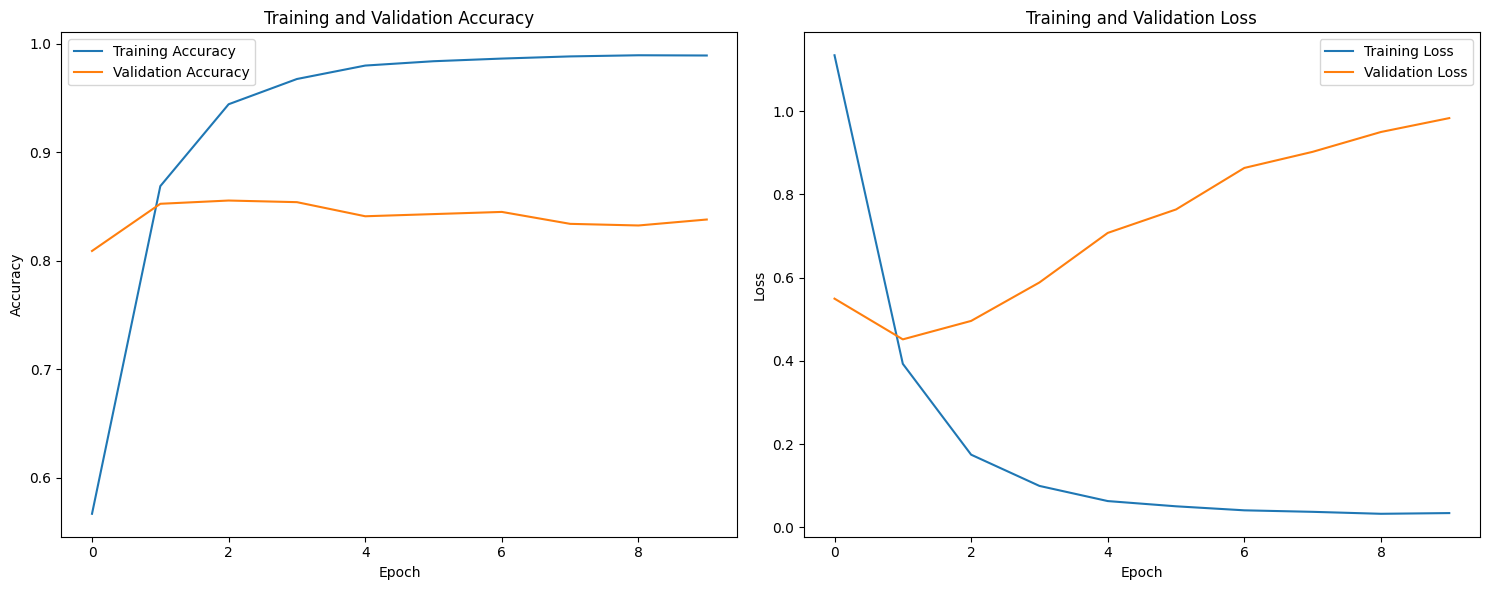

In [125]:
visualization(history)

##### <font color = 'green'> 2. Recurrent Neural Network based on Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU)

###### <font color = 'green'> Build the RNN model with LSTM - Long-Short-Term Memory

In [126]:
model_lstm = tf.keras.Sequential([
    Embedding(input_dim=maxword_token, output_dim=64, input_length=maxlen_pad),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

###### <font color = 'green'> Summarizing the total, trainable and non-trainable parameters from the model

In [127]:
model_lstm.build(input_shape=(None, maxlen_pad))
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 19, 64)              │         701,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,262 (2.95 MB)

 Trainable params: 772,262 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

###### <font color = 'green'> Compile the recurrent neural network model with `LSTM`

In [128]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
history_lstm = model_lstm.fit(feature_tokenized, labels, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test_tokenized, y_test_encoded))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4013 - loss: 1.4470 - val_accuracy: 0.8195 - val_loss: 0.5236
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8713 - loss: 0.3800 - val_accuracy: 0.8770 - val_loss: 0.3589
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9362 - loss: 0.1837 - val_accuracy: 0.8935 - val_loss: 0.3108
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9580 - loss: 0.1219 - val_accuracy: 0.8855 - val_loss: 0.3793
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9641 - loss: 0.1061 - val_accuracy: 0.8915 - val_loss: 0.3779
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9728 - loss: 0.0763 - val_accuracy: 0.8830 - val_loss: 0.4426
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9755 - loss: 0.0661 - val_accuracy: 0.8915 - val_loss: 0.4298
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9788 - loss: 0.0618 - 

In [130]:
lstm_test_loss, lstm_test_accuracy = model_lstm.evaluate(X_test_tokenized, y_test_encoded)
print(f'\nThe RNN(LSTM) Test Accuracy is: {round(lstm_test_accuracy,2)*100}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8812 - loss: 0.4889

The RNN(LSTM) Test Accuracy is: 88.0%


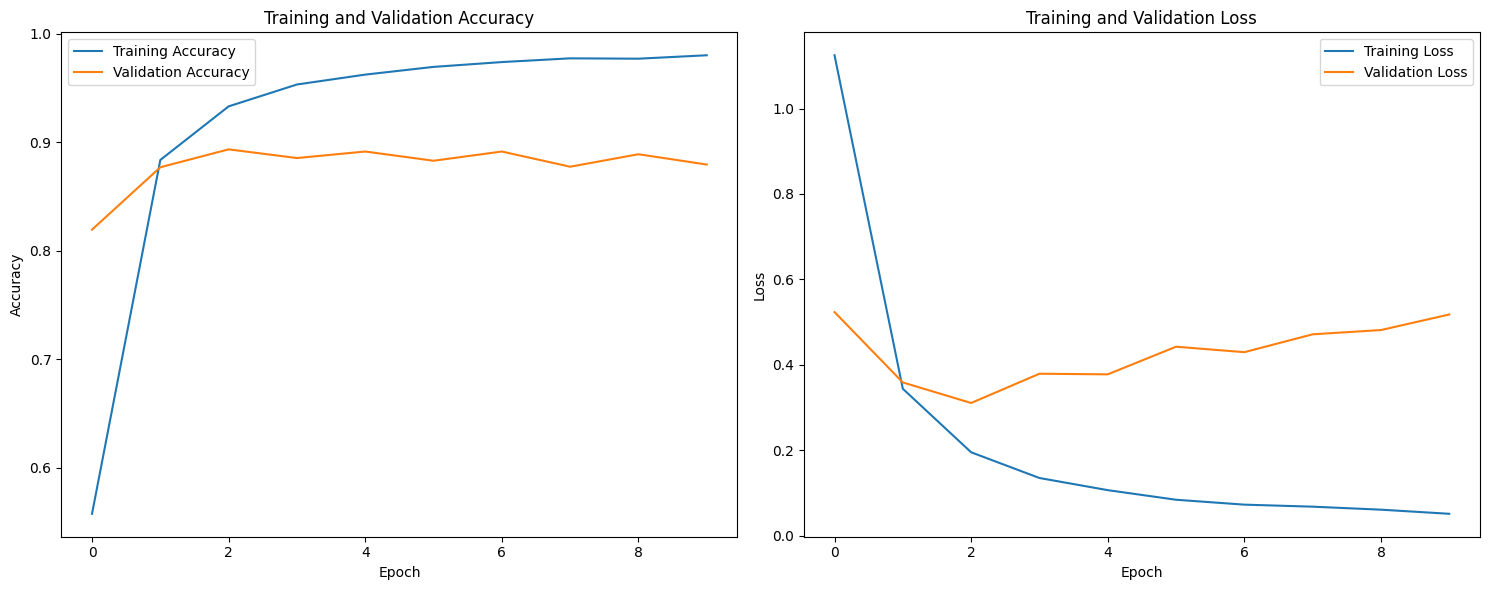

In [131]:
visualization(history=history_lstm)

##### Tuned the lstm model

In [132]:
model_lstm_improved = tf.keras.Sequential([
    Embedding(input_dim=maxword_token, output_dim=64, input_length=maxlen_pad),
    Bidirectional(LSTM(128, activation='tanh', recurrent_activation='sigmoid', unroll=True)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [133]:
model_lstm_improved.build(input_shape=(None, maxlen_pad))
model_lstm_improved.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 19, 64)              │         701,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,358 (3.50 MB)

 Trainable params: 916,358 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model_lstm_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
history_lstm_improved = model_lstm_improved.fit(feature_tokenized, labels, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test_tokenized, y_test_encoded))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.4526 - loss: 1.3505 - val_accuracy: 0.8530 - val_loss: 0.4046
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8963 - loss: 0.3015 - val_accuracy: 0.8865 - val_loss: 0.3177
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9397 - loss: 0.1711 - val_accuracy: 0.8940 - val_loss: 0.3361
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9611 - loss: 0.1098 - val_accuracy: 0.8890 - val_loss: 0.3352
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9645 - loss: 0.0963 - val_accuracy: 0.8920 - val_loss: 0.3523
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9725 - loss: 0.0747 - val_accuracy: 0.8870 - val_loss: 0.3673
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9740 - loss: 0.0731 - val_accuracy: 0.8900 - val_loss: 0.4227
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9806 - loss: 0.0524 - 

In [136]:
lstm_test_loss, lstm_test_accuracy = model_lstm_improved.evaluate(X_test_tokenized, y_test_encoded)
print(f'\nThe RNN(LSTM_improved) Test Accuracy is: {round(lstm_test_accuracy,2)*100}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8850 - loss: 0.5410

The RNN(LSTM_improved) Test Accuracy is: 88.0%


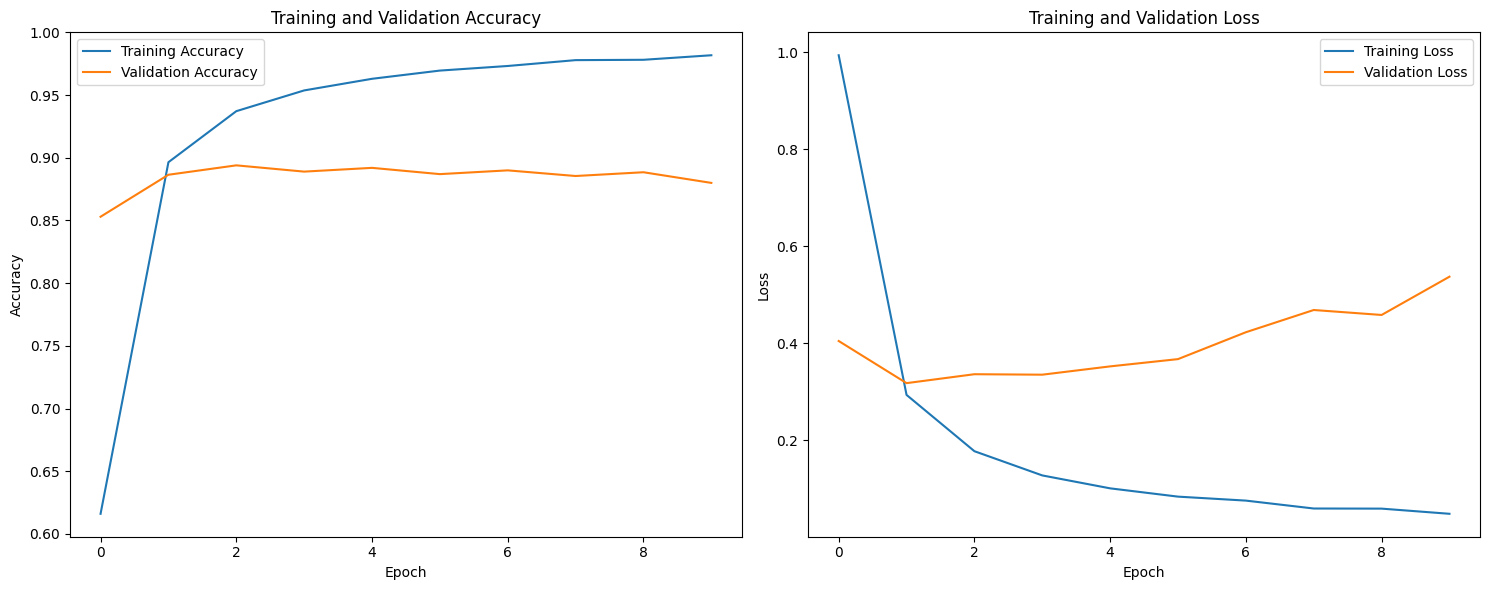

In [137]:
visualization(history=history_lstm_improved)

###### <font color = 'green'> Building the RNN model with Gated Recurrent Unit (GRU)

In [138]:
def build_rnn_with_gru_model():

  model_gru = tf.keras.Sequential([
  Embedding(input_dim=maxword_token, output_dim=64, input_length=maxlen_pad),
  Bidirectional(GRU(128, activation='tanh', recurrent_activation='sigmoid', unroll=True)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dense(len(label_encoder.classes_), activation='softmax')
  ])
  return model_gru

In [139]:
model_gru = build_rnn_with_gru_model()
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
model_gru.build(input_shape=(None, maxlen_pad))
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 19, 64)              │         701,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         148,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 867,718 (3.31 MB)

 Trainable params: 867,718 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
history_gru = model_gru.fit(feature_tokenized, labels, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test_tokenized, y_test_encoded))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.4549 - loss: 1.3223 - val_accuracy: 0.8440 - val_loss: 0.4017
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8829 - loss: 0.3207 - val_accuracy: 0.8955 - val_loss: 0.2880
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9247 - loss: 0.2030 - val_accuracy: 0.9000 - val_loss: 0.2907
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9507 - loss: 0.1377 - val_accuracy: 0.8900 - val_loss: 0.3003
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9635 - loss: 0.1006 - val_accuracy: 0.8915 - val_loss: 0.3363
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9737 - loss: 0.0759 - val_accuracy: 0.8840 - val_loss: 0.3613
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9759 - loss: 0.0688 - val_accuracy: 0.8870 - val_loss: 0.3747
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9803 - loss: 0.0578 - 

In [142]:
test_loss, test_accuracy = model_gru.evaluate(X_test_tokenized, y_test_encoded)
print(f'\nThe RNN(GRU) Test Accuracy is: {round(test_accuracy,2)*100}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8763 - loss: 0.4940

The RNN(GRU) Test Accuracy is: 88.0%


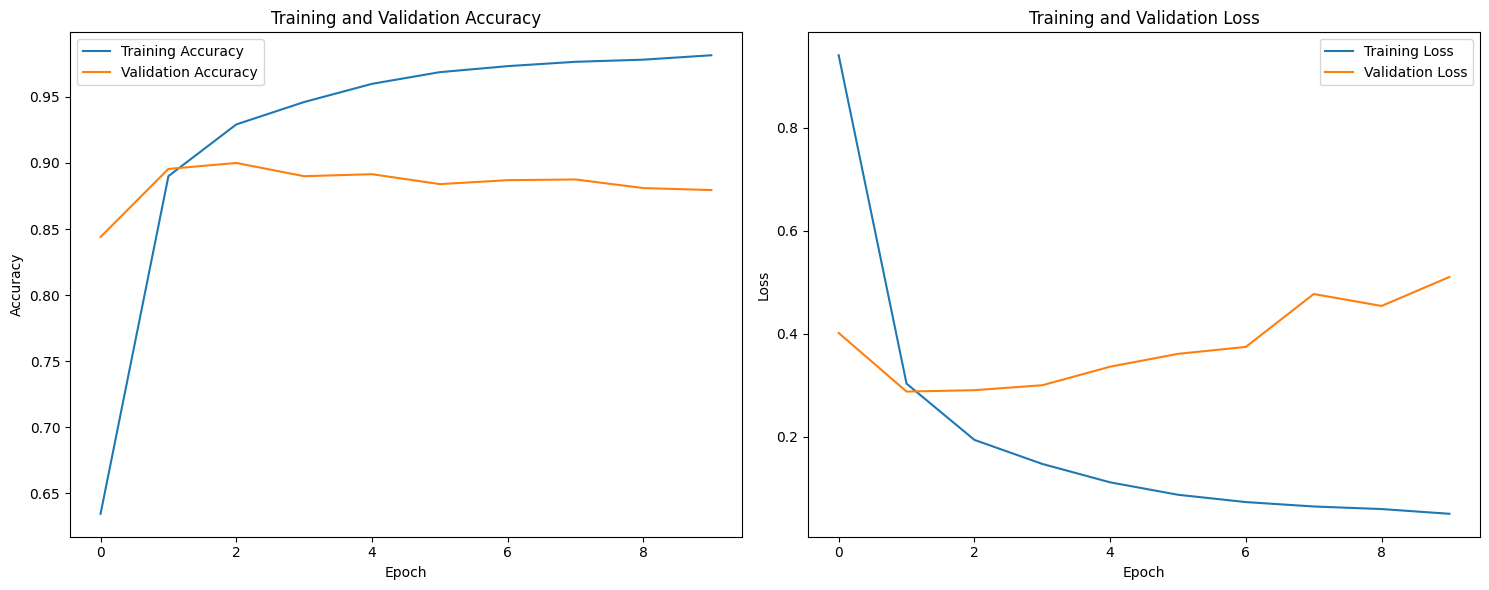

In [143]:
visualization(history=history_gru)

###### Classification Reports for `FCNN, RNN(LSTM), RNN(GRU)`

In [144]:
def prediction_model(any_model, X_test_set):
  predictions = any_model.predict(X_test_set)
  return predictions.argmax(axis=1)

In [145]:
X_test_pad = X_test_tokenized
y_test_arr = y_test_encoded

In [146]:
# Make predictions using each model on the test_set
y_pred_fcnn = prediction_model(model_fcnn, X_test_pad)
y_pred_lstm = prediction_model(model_lstm, X_test_pad)
y_pred_lstm_improved = prediction_model(model_lstm_improved, X_test_pad)
y_pred_gru = prediction_model(model_gru, X_test_pad)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [147]:
# The y_test_arr is one-hot encoded, converted to single-label format

labels = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
y_test_single_label = np.argmax(y_test_arr, axis=1)

accuracy_fcnn = accuracy_score(y_test_single_label, y_pred_fcnn)
accuracy_lstm = accuracy_score(y_test_single_label, y_pred_lstm)
accuracy_lstm_improved = accuracy_score(y_test_single_label, y_pred_lstm_improved)
accuracy_gru = accuracy_score(y_test_single_label, y_pred_gru)

In [148]:
# Accuracy results:
print("Accuracy - FCNN:", accuracy_fcnn)
print("Accuracy - lstm:", accuracy_lstm)
print("Accuracy - lstm_improved:", accuracy_lstm_improved)
print("Accuracy - GRU:", accuracy_gru)

Accuracy - FCNN: 0.838
Accuracy - lstm: 0.8795
Accuracy - lstm_improved: 0.88
Accuracy - GRU: 0.8795


###### Display classification reports for detailed metrics of all the models

In [149]:
print("\nClassification Report - FCNN:")
print(classification_report(y_test_single_label, y_pred_fcnn))


print("\nClassification Report - LSTM:")
print(classification_report(y_test_single_label, y_pred_lstm))


print("\nClassification Report - LSTM_IMPROVED:")
print(classification_report(y_test_single_label, y_pred_lstm_improved))


print("\nClassification Report - GRU:")
print(classification_report(y_test_single_label, y_pred_gru))


Classification Report - FCNN:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       261
           1       0.80      0.77      0.78       231
           2       0.85      0.87      0.86       675
           3       0.73      0.64      0.68       161
           4       0.88      0.90      0.89       584
           5       0.76      0.67      0.71        88

    accuracy                           0.84      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.84      0.84      0.84      2000


Classification Report - LSTM:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       261
           1       0.83      0.86      0.84       231
           2       0.91      0.89      0.90       675
           3       0.78      0.76      0.77       161
           4       0.92      0.92      0.92       584
           5       0.90      0.68      0.77        88

    accuracy   

###### Saving the keras models - FCNN, RNN and GRU

In [150]:
os.chdir(model_path)

In [151]:
os.chdir(note_path)

#### <font color = 'green'> 4. FINE-TUNING A BERT TRANSFORMER FROM HUGGINGFACE

###### <font color = 'green'> 3. A fine-tuned Transformer Architecture from a pre-trained model - Using `Bidirectional Encoder Representations from Transformers (BERT)`

In [152]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset

###### Load the dataset

In [153]:
df_copy = df.copy()

In [154]:
df_copy = df_copy.sample(100)

In [155]:
features = df_copy.drop('emotions', axis=1)
target = df_copy['emotions']

In [156]:
features = df_copy['text']
target = df_copy['emotions']

###### Train_Test_Split

In [157]:
features = features
target = target
size = 0.01
seed = 42

X_train, X_test, y_train, y_test = train_test_splitter(features, target, size, seed)

###### Training

In [158]:
print('Training features', len(X_train))
print('Training labels', len(y_train))

Training features 99
Training labels 99


In [159]:
features = X_train
target = y_train
size = 0.01
seed = 42

X_training, X_validation, y_training, y_validation = train_test_splitter(features, target, size, seed)

In [160]:
print('X_training', len(X_training))
print('y_training', len(y_training))

X_training 98
y_training 98


In [161]:
X_training = X_training.reset_index(drop=True)
y_training = y_training.reset_index(drop=True)
train_data = pd.concat([X_training, y_training], axis=1)

###### Validation

In [162]:
print('X_validation', len(X_validation))
print('y_validation', len(y_validation))

X_validation 1
y_validation 1


In [163]:
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)
val_data = pd.concat([X_validation, y_validation], axis=1)

###### Testing

In [164]:
print('Testing features', len(X_test))
print('Testing labels', len(y_test))

Testing features 1
Testing labels 1


In [165]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_data = pd.concat([X_test, y_test], axis=1)

In [166]:
emotion_to_label = {emotion: i for i, emotion in enumerate(set(train_data['emotions']))}
label_to_emotion = {i: emotion for emotion, i in emotion_to_label.items()}

In [167]:
print(emotion_to_label)
print(label_to_emotion)

{'surprise': 0, 'anger': 1, 'sadness': 2, 'joy': 3, 'love': 4, 'fear': 5}
{0: 'surprise', 1: 'anger', 2: 'sadness', 3: 'joy', 4: 'love', 5: 'fear'}


##### Creating the custom datasets using object oriented programming - `OOP`

In [168]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer, emotion_to_label, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.emotion_to_label = emotion_to_label
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        emotion = self.data.iloc[idx]['emotions']
        label = self.emotion_to_label[emotion]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

###### Maximum length

Choose any one according to the nature of the text task: 

The average length of the padding sequence is: 20
The median length of the padding sequence is: 17
The standard deviation for the length of the padding sequence is: 11
The 95th percentile for the coverage for the length of the padding sequence is: 40


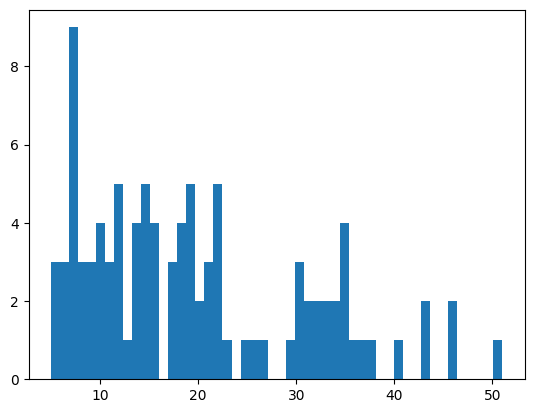

In [169]:
max_length_padding_seq(training=X_training)

In [170]:
max_word_using_frequency_based(training=X_training)

The maximum word for the tokenizer is: 699
The top 5 most common words with their counts are: --> [('i', 173), ('feel', 77), ('and', 72), ('to', 67), ('the', 37)]


###### Loading the BERT tokenizers and model

In [171]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(emotion_to_label))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###### Create dataloaders

###### Custom collate function

In [172]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]
    
    input_ids = pad_sequence(input_ids, batch_first=True)
    attention_mask = pad_sequence(attention_mask, batch_first=True)
    labels = torch.stack(labels)
    
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

In [174]:
batch_size = 32
maxlen = 42

train_dataset = EmotionDataset(train_data, tokenizer, emotion_to_label, max_length=maxlen)
val_dataset = EmotionDataset(val_data, tokenizer, emotion_to_label, max_length=maxlen)
test_dataset = EmotionDataset(test_data, tokenizer, emotion_to_label, max_length=maxlen)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

###### Setting up the training parameters

In [175]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


###### Training loop

In [176]:
def train(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)

###### Evaluation of the model

In [177]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            
            predictions.extend(preds.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())
    
    pred_emotions = [label_to_emotion[p] for p in predictions]
    true_emotions = [label_to_emotion[t] for t in true_labels]
    
    return accuracy_score(true_emotions, pred_emotions), classification_report(true_emotions, pred_emotions)

In [178]:
import time

start = time.perf_counter()

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, device)
    val_accuracy, val_report = evaluate(model, val_loader, device)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print("Validation Report:")
    print(val_report)

end = time.perf_counter()
print(f"Execution time: {end - start} seconds")

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

Epoch 1/3
Training Loss: 1.6594
Validation Accuracy: 0.0000
Validation Report:
              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

Epoch 2/3
Training Loss: 1.5997
Validation Accuracy: 0.0000
Validation Report:
              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Epoch 3/3
Training Loss: 1.5431
Validation Accuracy: 0.0000
Validation Report:
              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Execution time: 77.927419500018 seconds


C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

#### <font color='green'> Model Industrialization and Inferencing

###### tfidf industrialization

###### Load all saved models and preprocessing

In [179]:
import pickle
os.chdir(model_path)

In [180]:
with open('tfidf_and_bow_methods.pkl', 'rb') as file:
    tfidf_bow = pickle.load(file)

os.chdir(note_path)
tfidf_bow

{'tfidf_vectorizer_for_features': TfidfVectorizer(max_features=5000, ngram_range=(1, 4)),
 'label_encoding': LabelEncoder(),
 'naive_model_for_tfidf': MultinomialNB(),
 'bow_vectorizer_for_features': CountVectorizer(max_features=5000, ngram_range=(1, 4)),
 'naive_model_for_bow': MultinomialNB()}

In [181]:
tfidf_vectorizer = tfidf_bow['tfidf_vectorizer_for_features']
tfidf_model = tfidf_bow['naive_model_for_tfidf']
bow_vectorizer = tfidf_bow['bow_vectorizer_for_features']
bow_model = tfidf_bow['naive_model_for_bow']

In [182]:
tfidf_vectorizer
tfidf_model

def model_industrialization_tfidf(text):
    
    labels = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    
    #text = input('Please share your thoughts: ')
    text = text_preprocessor(features=text, mode=True)
    
    # convert string of text to list
    if isinstance(text, str):
        text = [text]

    X_vectorized = tfidf_vectorizer.transform(text)
    X_arr = X_vectorized.toarray()
    X_df = pd.DataFrame(X_arr, columns=tfidf_vectorizer.get_feature_names_out())

    predictions = tfidf_model.predict(X_df)
    if predictions == 0:
        label = labels[0]
    elif predictions == 1:
        label = labels[1]
    elif predictions == 2:
        label = labels[2]
    elif predictions == 3:
        label = labels[3]
    elif predictions == 4:
        label = labels[4]
    else:
        label = labels[5]

    pred_df = pd.DataFrame({'predicted_emotions': [predictions[0]], 'emotions': [label]}, columns=['predicted_emotions', 'emotions'])

    return pred_df    

In [183]:
import gradio as gr

In [184]:
examples=[
        ["I'm so happy about my new job!"],
        ["I'm feeling really sad today."],
        ["This makes me so angry!"],
        ["I'm terrified of what might happen."],
        ["I love spending time with my family."],
        ["Wow, I didn't expect that at all!"]]

inputs=[
        gr.Textbox(placeholder="What is on your mind..."),
        
    ]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(2, "fixed"), label="Thoughts and Emotions", headers=["Prediction", "Emotion"])]

title='Thoughts and Emotions NLP model using Term-Frequency-Inverse Document Frequency - TF-IDF by Olanrewaju Adegoke'
description='Express what is on your mind and I will predict your present state of emotions.'

interface = gr.Interface(fn = model_industrialization_tfidf, inputs = inputs, outputs = outputs, title=title, description=description, examples=examples)

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://92f1bb78e241a75a32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


###### bow deployment

In [185]:
bow_vectorizer
bow_model

def model_industrialization_bow(text):
    
    labels = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    
    text = text_preprocessor(features=text, mode=False)
    
    # convert string of text to list
    if isinstance(text, str):
        text = [text]

    X_vectorized = bow_vectorizer.transform(text)
    X_arr = X_vectorized.toarray()
    X_df = pd.DataFrame(X_arr, columns=bow_vectorizer.get_feature_names_out())

    predictions = bow_model.predict(X_df)
    if predictions == 0:
        label = labels[0]
    elif predictions == 1:
        label = labels[1]
    elif predictions == 2:
        label = labels[2]
    elif predictions == 3:
        label = labels[3]
    elif predictions == 4:
        label = labels[4]
    else:
        label = labels[5]

    pred_df = pd.DataFrame({'predicted_emotions': [predictions[0]], 'emotions': [label]}, columns=['predicted_emotions', 'emotions'])

    return pred_df    

In [186]:
examples=[
        ["I'm so happy about my new job!"],
        ["I'm feeling really sad today."],
        ["This makes me so angry!"],
        ["I'm terrified of what might happen."],
        ["I love spending time with my family."],
        ["Wow, I didn't expect that at all!"]]

inputs=[
        gr.Textbox(placeholder="What is on your mind..."),
        
    ]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(2, "fixed"), label="Thoughts and Emotions", headers=["Prediction", "Emotion"])]

title='Thoughts and Emotions NLP model using Bag of words by Olanrewaju Adegoke'
description='Express what is on your mind and I will predict your present state of emotions.'

interface = gr.Interface(fn = model_industrialization_bow, inputs = inputs, outputs = outputs, title=title, description=description, examples=examples)

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://6a3db4939b73c5c3ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


###### Tokenization model deployment

###### Load the saved keras model with tokenization

In [187]:
import pickle
os.chdir(model_path)

In [188]:
with open('keras_models_with_tokenization.pkl', 'rb') as file:
    tokenizer_model = pickle.load(file)

os.chdir(note_path)
tokenizer_model

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\nlp_projects\nlp\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'FCNN': <Sequential name=sequential_3, built=True>,
 'RNN(LSTM)': <Sequential name=sequential_4, built=True>,
 'RNN(LSTM_IMPROVED)': <Sequential name=sequential_5, built=True>,
 'RNN(GRU)': <Sequential name=sequential_7, built=True>}

In [189]:
best_model_tokenized = tokenizer_model['RNN(LSTM_IMPROVED)']
tokenizer = token_label['feature_tokenizer']

In [190]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
best_model_tokenized
tokenizer
maxlen_pad = 19

def model_industrialization_tokenizer(text, padding=True):
    
    labels = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    
    text = text_preprocessor(features=text, mode=True)
    
    # convert string of text to list
    if isinstance(text, str):
        text = [text]


    test_feat_seq = tokenizer.texts_to_sequences(text)
    
    if padding == True:
        padded_test_seq = pad_sequences(test_feat_seq, maxlen=maxlen_pad, padding='post')
    else:
        padded_test_seq = pad_sequences(test_feat_seq, maxlen=maxlen_pad, padding='pre')


    predictions = best_model_tokenized.predict(padded_test_seq)

    predicted_class = np.argmax(predictions, axis=1)[0]

    predicted_label = labels[predicted_class]

    max_prediction = np.max(predictions[0])

    #pred_df = pd.DataFrame({'predicted_emotions': [max_prediction], 'emotions': [predicted_label]}, columns=['predicted_emotions', 'emotions'])
    pred_df = pd.DataFrame({'emotions': [predicted_label]}, columns=['emotions'])

    return pred_df    

In [191]:
examples=[
        ["I'm so happy about my new job!"],
        ["I'm feeling really sad today."],
        ["This makes me so angry!"],
        ["I'm terrified of what might happen."],
        ["I love spending time with my family."],
        ["Wow, I didn't expect that at all!"]]


inputs=[
        gr.Textbox(placeholder="What is on your mind...") 
    ]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(1, "fixed"), label='Thoughts and Emotions', headers=['Emotion'])]

title='Thoughts and Emotions NLP model using Tokenization with TensorFlow by Olanrewaju Adegoke'
description='Express what is on your mind and I will predict your present state of emotions.'

interface = gr.Interface(fn = model_industrialization_tokenizer, inputs = inputs, outputs = outputs, title=title, description=description, examples=examples)

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://d3c71abcd9176ddc79.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/ste

###### Conclusion:

<font color = 'green'> *After comparing the results, I obsereved that `RNN` with `LSTM_Improved` performs better on all the sentiments classes. The accuracy of the `LSTM_IMPROVED` was 89.0% which is only measuring the probability of true predictions with its precison and recall averagely at 89.0%*

<font color = 'green'> *This was validated with the `LSTM_IMPROVED` precision weighted average of 0.89, same as F1-score and recall. The essence of considering these metrics is to to ascertain that the model was able to identify and makes accurate classification for any sentiments present in any given sentence or text.*

##### <font color = 'purple'> `Key takeaways from the comparison may include:`
<font color = 'green'> *Some models may perform better on certain sentiment classes in the case of FCNN, LSTM and GRU.*

<font color='green'> *The fine-tuned BERT model has the potential of outperforming all other model as it was observed of it relative increase accuracy on a very small amount of data. The choice of the small amount of text sample taken was due to computational and resources available at the time of this analysis*

<font color = 'green'> *They were Overfitting problems experienced by some of the models but this could be corrected by hyperparametrizing and further tuning of all existing models.*

<font color = 'green'> *With 10 Epochs set for each models, The training time and resource requirements were less in FCNN, LSTM and GRU compared to epochs = 3 for BERT pretrained models and small amount of samples still takes very longer time to compute.*

<font color = 'green'> *Based on these piece of work and observations, I recommend that the best approach is to optimize neural networks with memory term algorithms and fine-tune the parameters to obatin a more robust results especially on classification analysis for text.*

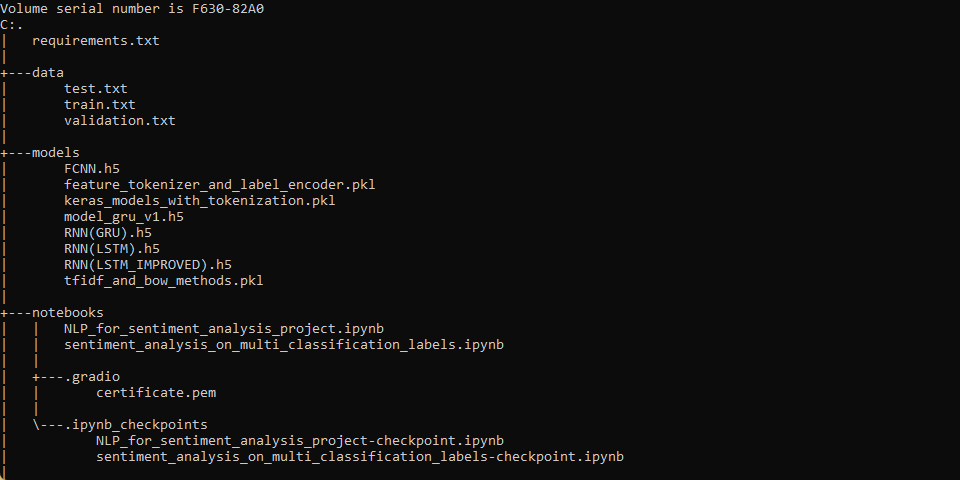

##### THANK YOU